# COVID DATA ANALYSIS

## Import the modules

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
print('Modules are imported.')

Modules are imported.


## Load the dataset

In [2]:
df = pd.read_csv('COVID.csv')

## Print the dataset

In [3]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


## Shape of the dataframe

In [4]:
df.shape

(321, 6)

## Summary statistics

In [5]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


## Data Preparation and Cleaning

Check for missing values in columns

In [6]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [7]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

## Compute Global Total

In [8]:
# Calculate global confirmed, death, and recovery totals
total_confirmed = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()

print(f"\nGlobal Confirmed Cases: {total_confirmed}")
print(f"Global Deaths: {total_deaths}")
print(f"Global Recoveries: {total_recovered}")


Global Confirmed Cases: 3193886
Global Deaths: 227638
Global Recoveries: 972719


## Top 10 regions by Confirmed cases

In [9]:
# Grouping by 'Region'
region_summary = df.groupby('Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Sort regions by confirmed cases
region_summary_sorted = region_summary.sort_values(by='Confirmed', ascending=False)

# Display top 10 regions
print("\nTop 10 Regions by Confirmed Cases:")
print(region_summary_sorted.head(10))



Top 10 Regions by Confirmed Cases:
             Region  Confirmed  Deaths  Recovered
174              US    1039909   60967     120720
158           Spain     236899   24275     132929
83            Italy     203591   27682      71252
59           France     166543   24121      49118
173              UK     166441   26166        857
63          Germany     161539    6467     120400
172          Turkey     117589    3081      44040
139          Russia      99399     972      10286
79             Iran      93657    5957      73791
104  Mainland China      82862    4633      77610


## Group data by Region

In [10]:
grouped = df.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
grouped

,Region,Confirmed,Deaths,Recovered
0,Afghanistan,1939,60,252
1,Albania,766,30,455
2,Algeria,3848,444,1702
3,Andorra,743,42,423
4,Angola,27,2,7
...,...,...,...,...
182,West Bank and Gaza,344,2,71
183,Western Sahara,6,0,5
184,Yemen,6,0,1
185,Zambia,97,3,54


## Sort the results by Confirmed cases in descending order to identify the top regions

In [11]:
grouped = grouped.sort_values(by='Confirmed', ascending=False)
grouped.head(10)

,Region,Confirmed,Deaths,Recovered
174,US,1039909,60967,120720
158,Spain,236899,24275,132929
83,Italy,203591,27682,71252
59,France,166543,24121,49118
173,UK,166441,26166,857
63,Germany,161539,6467,120400
172,Turkey,117589,3081,44040
139,Russia,99399,972,10286
79,Iran,93657,5957,73791
104,Mainland China,82862,4633,77610


## Visualizing missing data using a heatmap

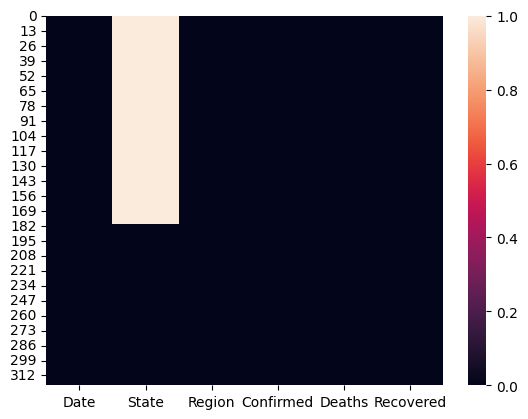

In [12]:
sns.heatmap(df.isnull())
plt.show()

## Bar Chart - Top 10 regions by Confirmed cases

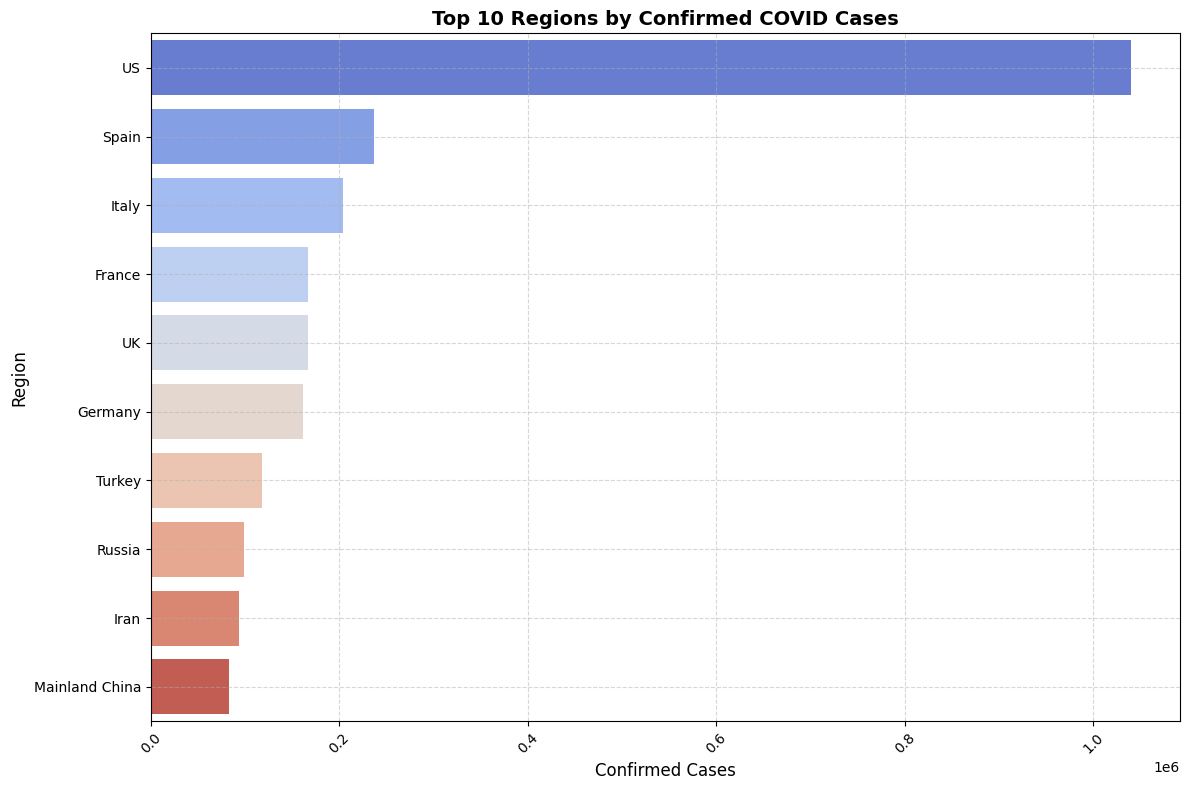

In [13]:
plt.figure(figsize=(12, 8))

# Explicitly assign `hue` with `Region`, but disable the legend for clarity
sns.barplot(x='Confirmed', y='Region', hue='Region', data=region_summary_sorted.head(10), palette='coolwarm', legend=False)

plt.title('Top 10 Regions by Confirmed COVID Cases', fontsize=14, fontweight='bold')
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Histogram - Global Distribution of COVID Case

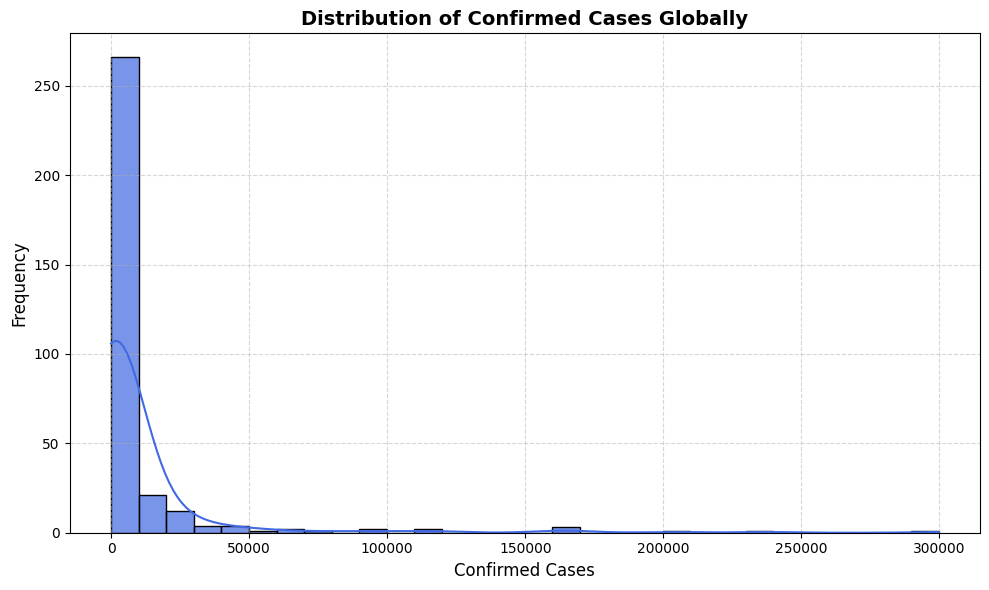

In [14]:
plt.figure(figsize=(10, 6))

# Improved histogram with better binning and transparency
sns.histplot(df['Confirmed'], bins=30, color='royalblue', kde=True, alpha=0.7)

plt.title('Distribution of Confirmed Cases Globally', fontsize=14, fontweight='bold')
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 1.Show the number of Confirmed,Deaths and recovered cases in each region.

In [15]:
df.groupby('Region').sum()

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
...,...,...,...,...,...
West Bank and Gaza,4/29/2020,0,344,2,71
Western Sahara,4/29/2020,0,6,0,5
Yemen,4/29/2020,0,6,0,1


In [16]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=True)

Region
Yemen                          6
Western Sahara                 6
Bhutan                         7
Mauritania                     8
Sao Tome and Principe          8
                          ...   
UK                        166441
France                    166543
Italy                     203591
Spain                     236899
US                       1039909
Name: Confirmed, Length: 187, dtype: int64

## 2.Remove all the records where confirmed cases is less than 10

In [17]:
df=df[~(df['Confirmed']<10)]
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


## 3.In which region,max number of confirmed cases were recorded?

In [18]:
df.groupby("Region").Confirmed.sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Name: Confirmed, dtype: int64

## 4.in which region, min number of death cases were recorded?

In [19]:
df.groupby("Region").Deaths.sum().sort_values(ascending=True).head(10)

Region
Cambodia                    0
Fiji                        0
Dominica                    0
Central African Republic    0
Eritrea                     0
Laos                        0
Holy See                    0
Nepal                       0
Madagascar                  0
Macau                       0
Name: Deaths, dtype: int64

## 5.How many confirmed,deaths and recovered cases were reported from india till 29th April 2020?

In [20]:
df[df.Region=='India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


## 6. a)Sort the entire data wrt no of confirmed cases in ascending order.

In [21]:
df.sort_values(by=['Confirmed'],ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
156,4/29/2020,NaN,Suriname,10,1,8
27,4/29/2020,NaN,Burundi,11,1,4
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


## 6. b) Sort the entire data wrt no of recovered cases in descending order

In [22]:
df.sort_values(by=['Recovered'],ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
270,4/29/2020,Northern Mariana Islands,US,14,2,0
299,4/29/2020,South Dakota,US,2373,13,0
298,4/29/2020,South Carolina,US,5882,231,0
302,4/29/2020,Tennessee,US,10366,195,0
